In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.cross_decomposition import PLSRegression
%matplotlib inline


In [2]:
df = pd.read_csv('data.csv')
print(df)

          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driv

In [3]:

df.shape

(11914, 16)

In [4]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


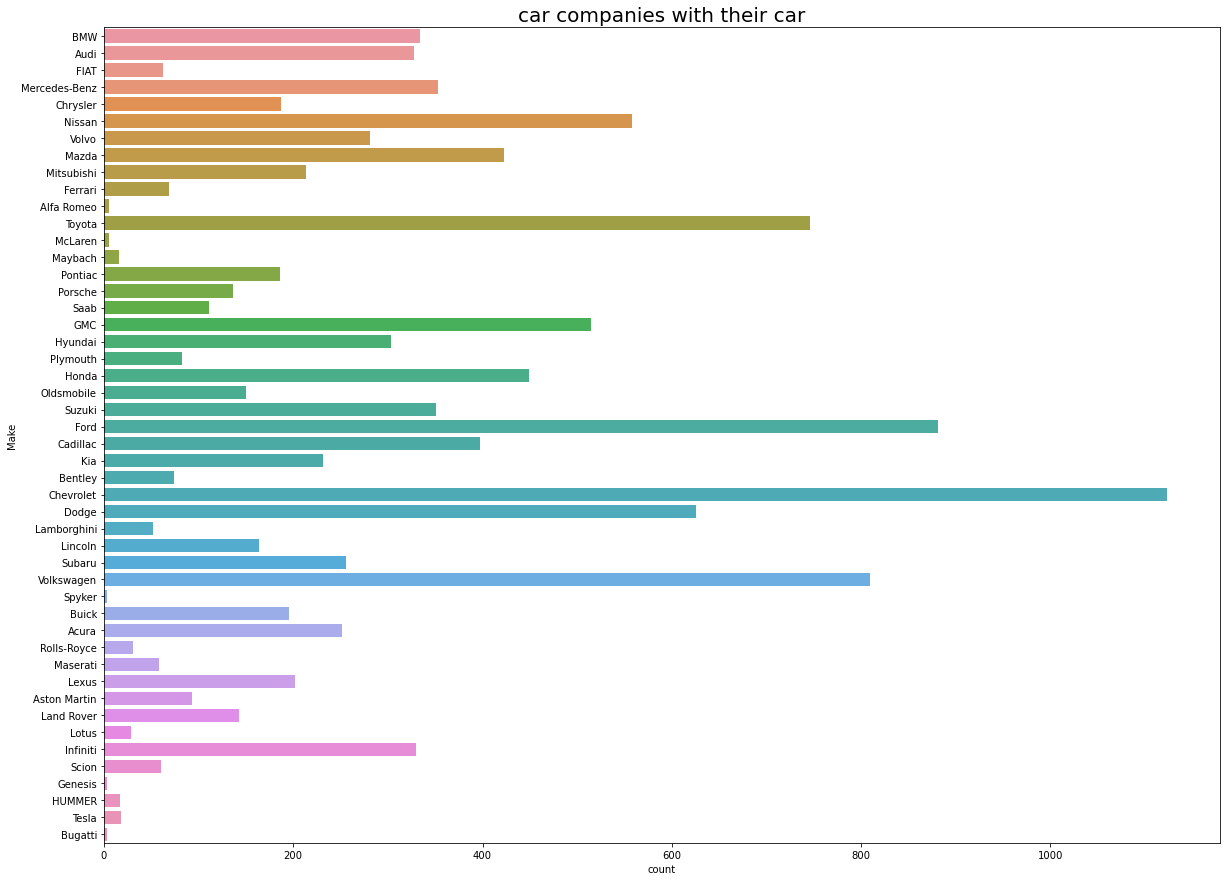

In [5]:
plt.figure(figsize=(20,15))
sns.countplot(y = df.Make)
plt.title('car companies with their car', fontsize=20)
plt.show()

C:\Users\IRDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


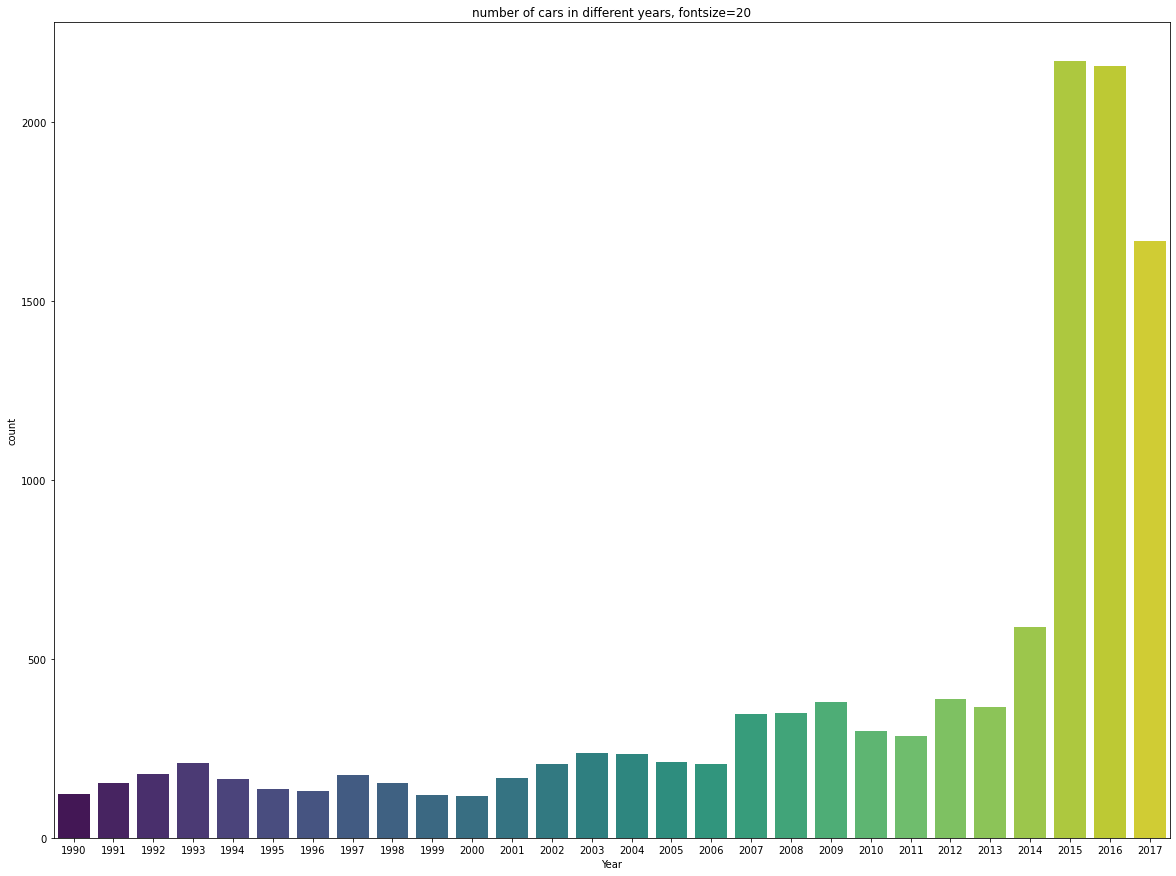

In [6]:
plt.figure(figsize=(20,15))
sns.countplot(df.Year, palette='viridis')
plt.title('number of cars in different years, fontsize=20')
plt.show()

C:\Users\IRDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


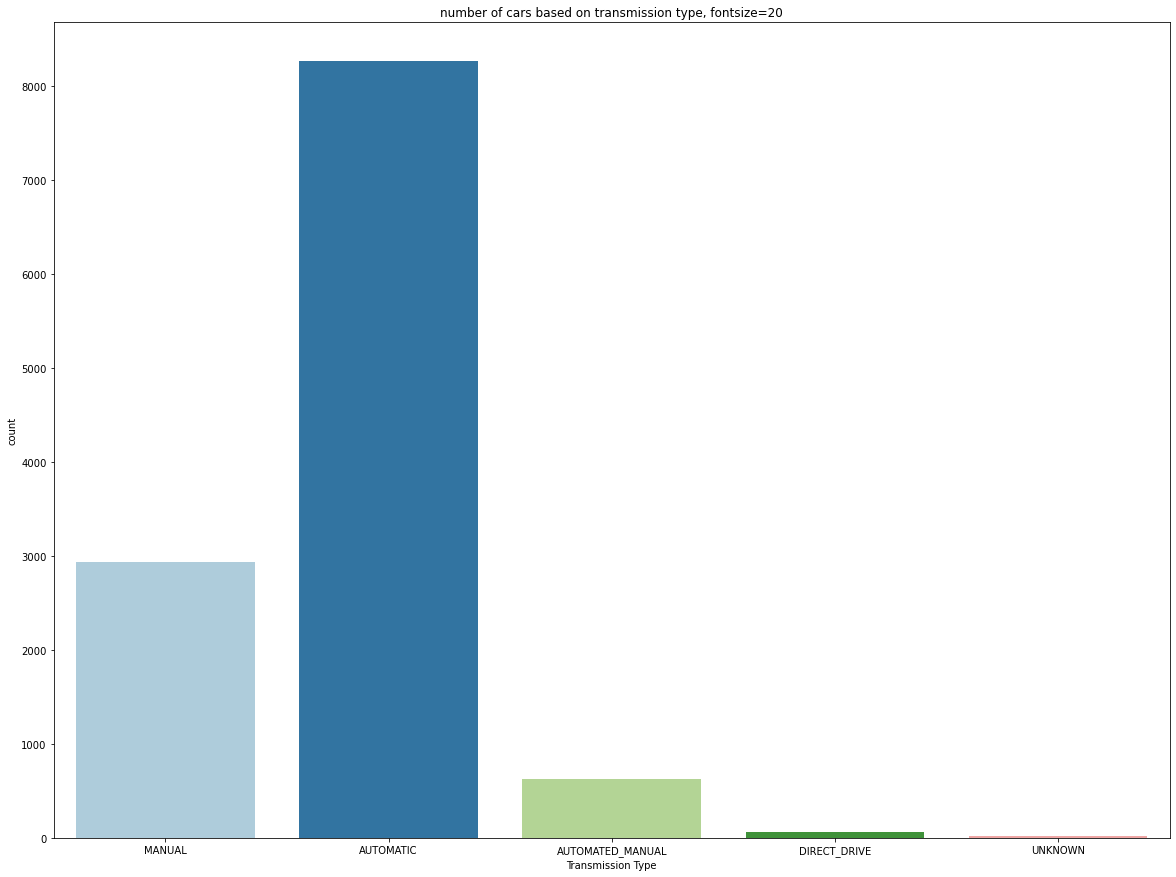

In [7]:
plt.figure(figsize=(20,15))
sns.countplot(df['Transmission Type'], palette= 'Paired')
plt.title('number of cars based on transmission type, fontsize=20')
plt.show()

In [8]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Engine Fuel Type'>

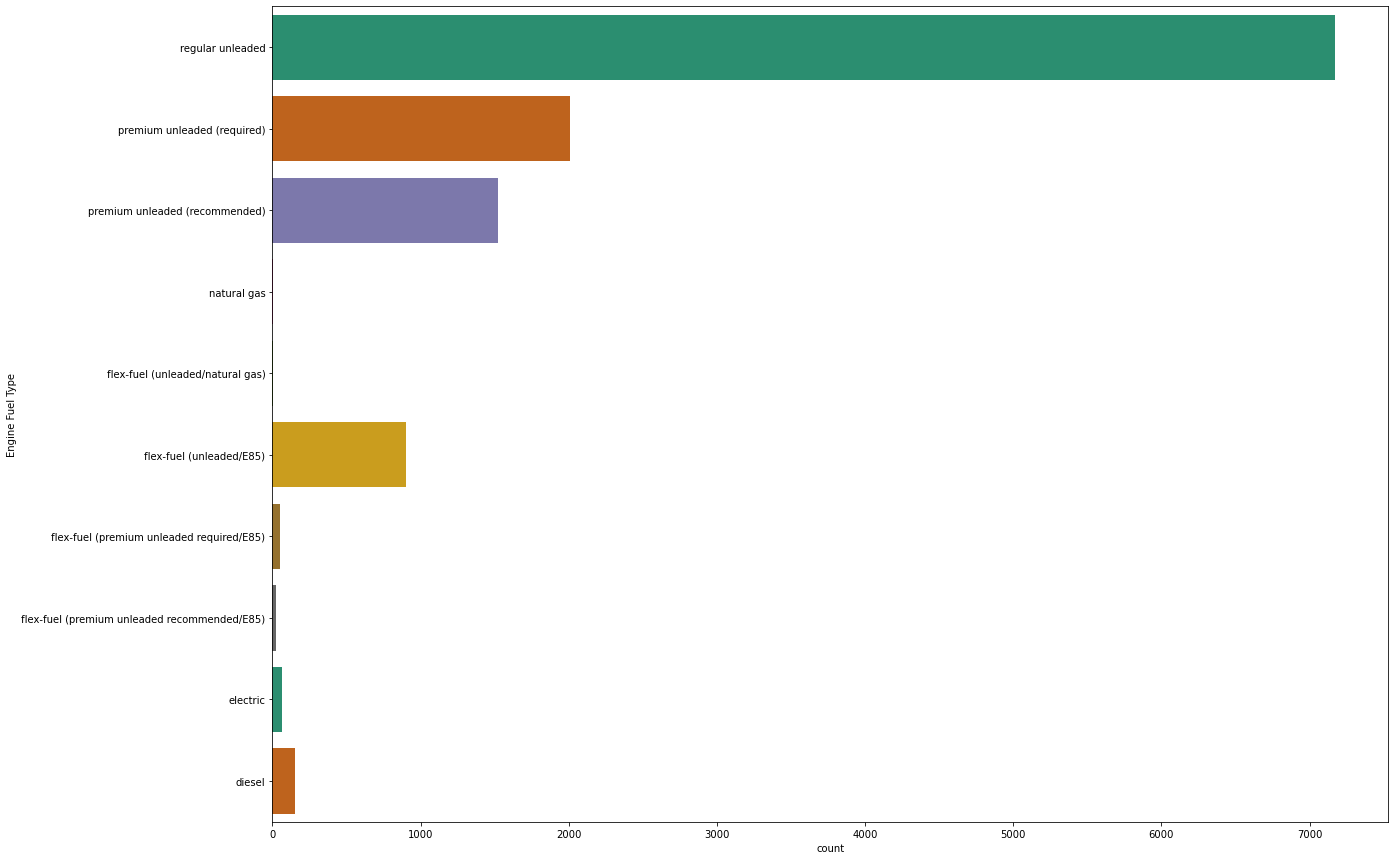

In [9]:
plt.figure(figsize=(20, 15))
sns.countplot(y = df['Engine Fuel Type'].sort_values(ascending = False), palette='Dark2')


C:\Users\IRDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle Size', ylabel='count'>

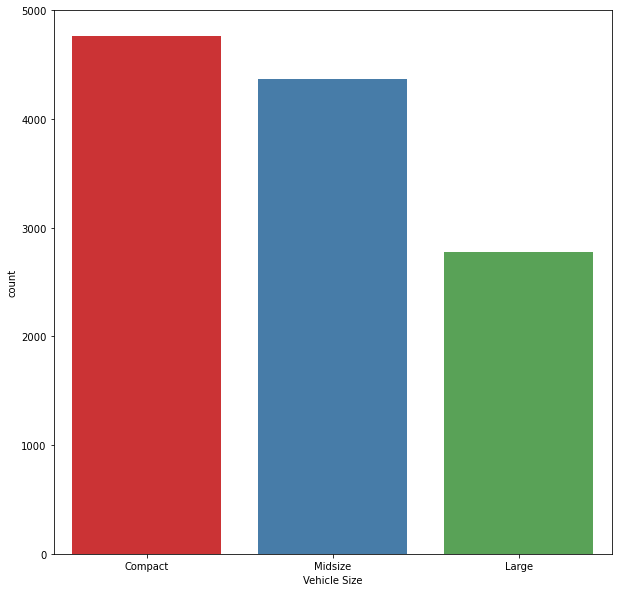

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(df['Vehicle Size'], palette='Set1')

In [11]:
df.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean'])

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

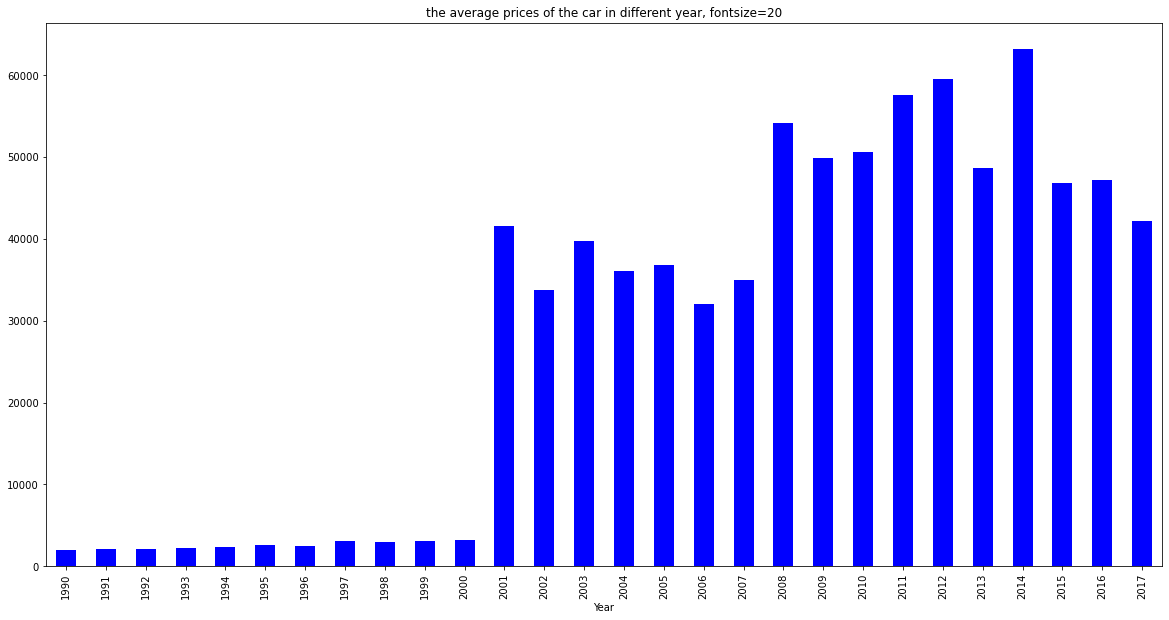

In [12]:
plt.figure(figsize=(20,10))
df.groupby('Year')['MSRP'].mean().plot(kind='bar', color='b')
plt.title('the average prices of the car in different year, fontsize=20')
plt.show()

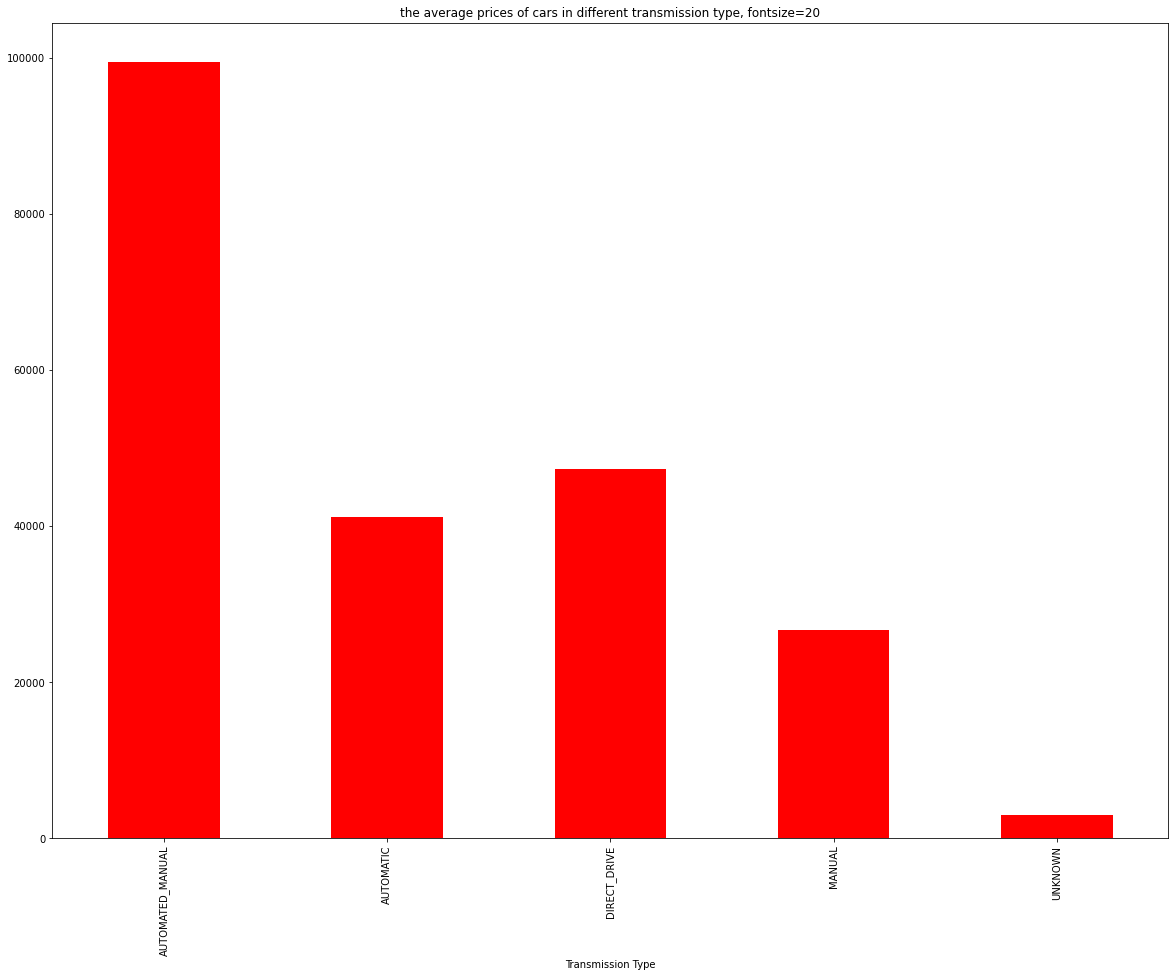

In [13]:
plt.figure(figsize=(20,15))
df.groupby('Transmission Type')['MSRP'].mean().plot(kind='bar', color='r')
plt.title('the average prices of cars in different transmission type, fontsize=20')
plt.show()

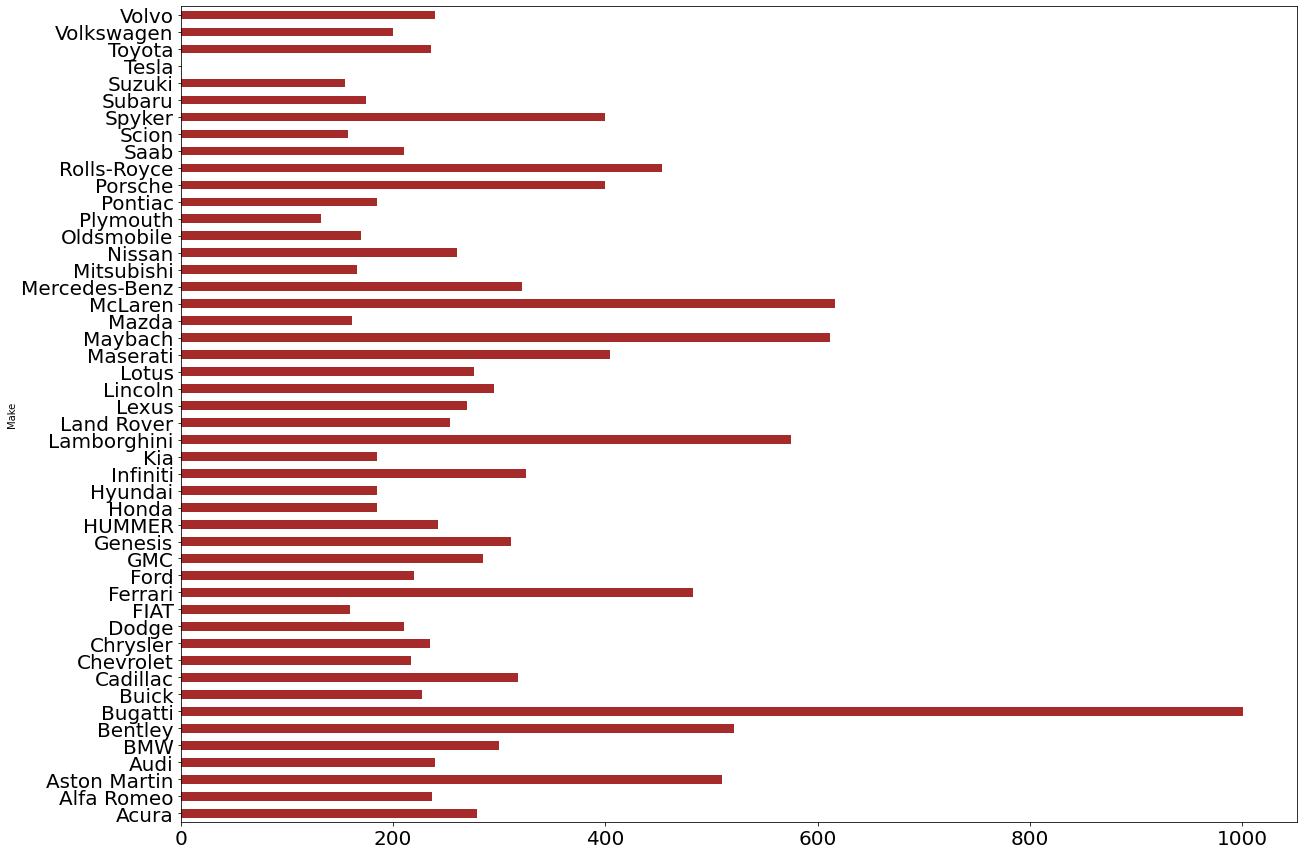

In [14]:
plt.figure(figsize=(20,15))
df.groupby('Make').median()['Engine HP'].plot(kind='barh', fontsize=20, color='brown')
plt.show()

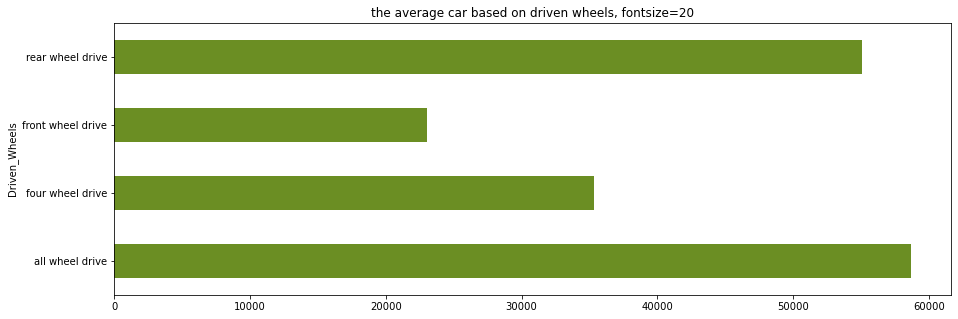

In [15]:
plt.figure(figsize=(15,5))
df.groupby('Driven_Wheels').mean()['MSRP'].plot(kind='barh', color='olivedrab')
plt.title('the average car based on driven wheels, fontsize=20')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

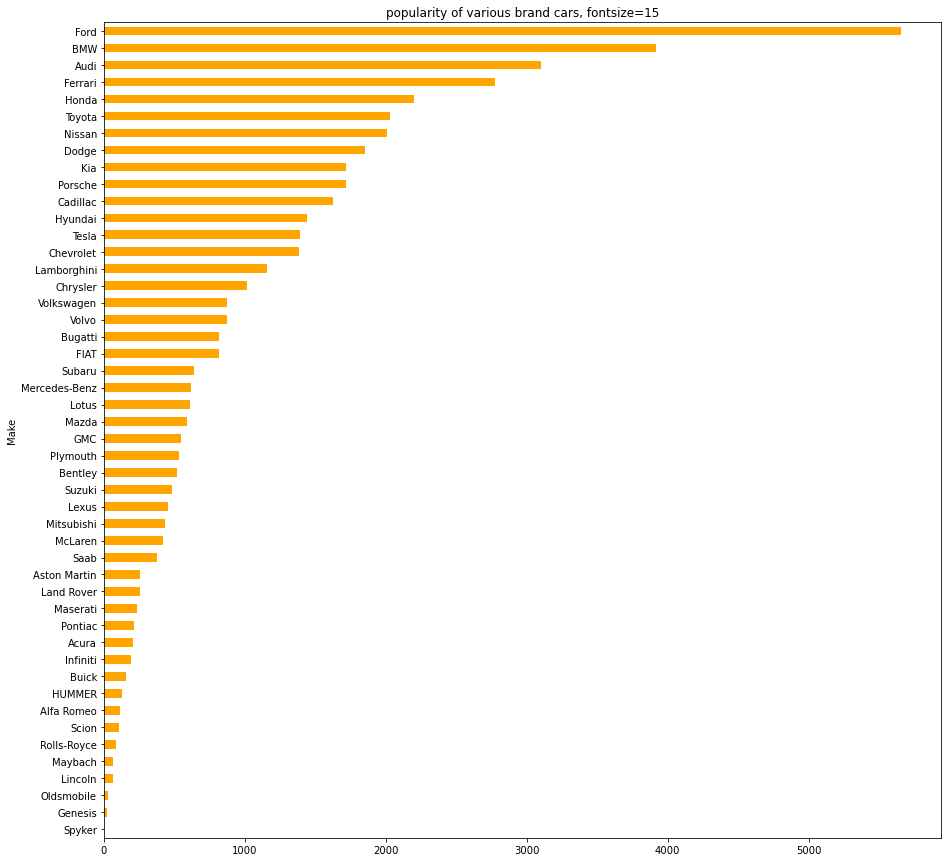

In [16]:
plt.figure(figsize=(15,15))
df.groupby('Make').mean()['Popularity'].sort_values(ascending=True).plot(kind='barh', color='orange')
plt.yticks(fontsize=10)
plt.title('popularity of various brand cars, fontsize=15')
plt.show

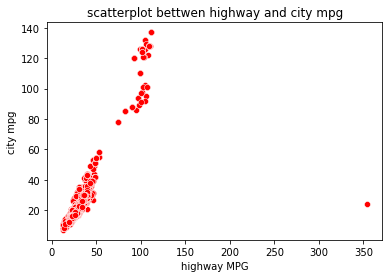

In [17]:
sns.scatterplot(x='highway MPG', y='city mpg', data=df, color='r')
plt.title('scatterplot bettwen highway and city mpg')
plt.show()

In [18]:
df[df['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [19]:
data = df[df['highway MPG'] < 350]

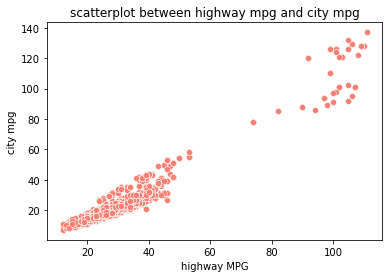

In [20]:
sns.scatterplot(x='highway MPG', y='city mpg', data=data, color='salmon')
plt.title('scatterplot between highway mpg and city mpg')
plt.show()

In [21]:
df['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

<AxesSubplot:xlabel='highway MPG'>

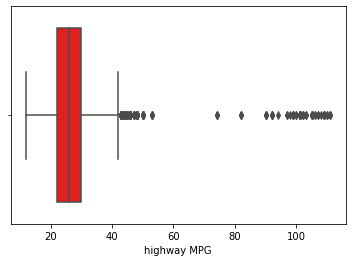

In [22]:
sns.boxplot(x='highway MPG', data=data, color='r')

In [23]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(df['highway MPG'], i)))


The 90.0th percentile value is 35.00
The 91.0th percentile value is 36.00
The 92.0th percentile value is 36.00
The 93.0th percentile value is 37.00
The 94.0th percentile value is 37.00
The 95.0th percentile value is 38.00
The 96.0th percentile value is 39.00
The 97.0th percentile value is 40.00
The 98.0th percentile value is 42.00
The 99.0th percentile value is 46.00


In [24]:
for i in [x * 0.1 for x in range (990,1000)]:
    print('The {:.1f}th percentile value is {:.2f}'.format(i, np.percentile(df['highway MPG'], i)))

The 99.0th percentile value is 46.00
The 99.1th percentile value is 46.00
The 99.2th percentile value is 48.00
The 99.3th percentile value is 48.00
The 99.4th percentile value is 51.57
The 99.5th percentile value is 90.00
The 99.6th percentile value is 98.35
The 99.7th percentile value is 101.00
The 99.8th percentile value is 105.00
The 99.9th percentile value is 108.09


In [25]:
data = df[df['highway MPG'] < 60]

<AxesSubplot:xlabel='highway MPG'>

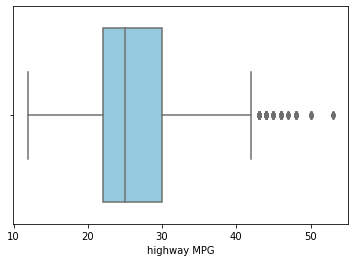

In [26]:
sns.boxplot(x='highway MPG', data=data, color='skyblue')

<AxesSubplot:xlabel='city mpg'>

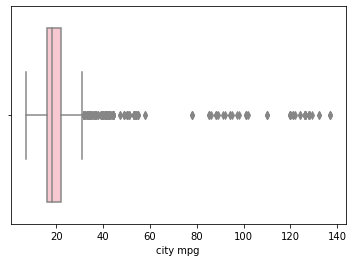

In [27]:
sns.boxplot(x='city mpg', data=df, color='pink')

In [28]:
for i in range(90, 100):
    print('the {:.1f}th percentile value is{:.2f}'.format(i, np.percentile(df['city mpg'], i)))

the 90.0th percentile value is26.00
the 91.0th percentile value is27.00
the 92.0th percentile value is27.00
the 93.0th percentile value is28.00
the 94.0th percentile value is28.00
the 95.0th percentile value is29.00
the 96.0th percentile value is30.00
the 97.0th percentile value is31.00
the 98.0th percentile value is36.00
the 99.0th percentile value is44.00


In [29]:
for i in[x * 0.1 for x in range(990, 1000)]:
    print('The{:.1f}th percentile value is{:.2f}'.format(i, np.percentile(df['city mpg'], i)))

The99.0th percentile value is44.00
The99.1th percentile value is49.00
The99.2th percentile value is51.00
The99.3th percentile value is53.00
The99.4th percentile value is54.00
The99.5th percentile value is85.43
The99.6th percentile value is97.35
The99.7th percentile value is120.00
The99.8th percentile value is126.00
The99.9th percentile value is128.00


In [30]:
data = df[df['city mpg'] < 40]

<AxesSubplot:xlabel='city mpg'>

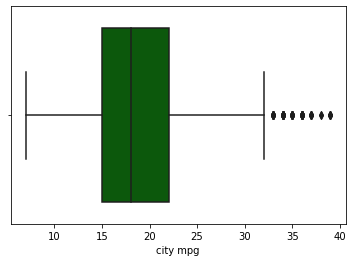

In [31]:
sns.boxplot(x='city mpg', data=data, color='darkgreen')

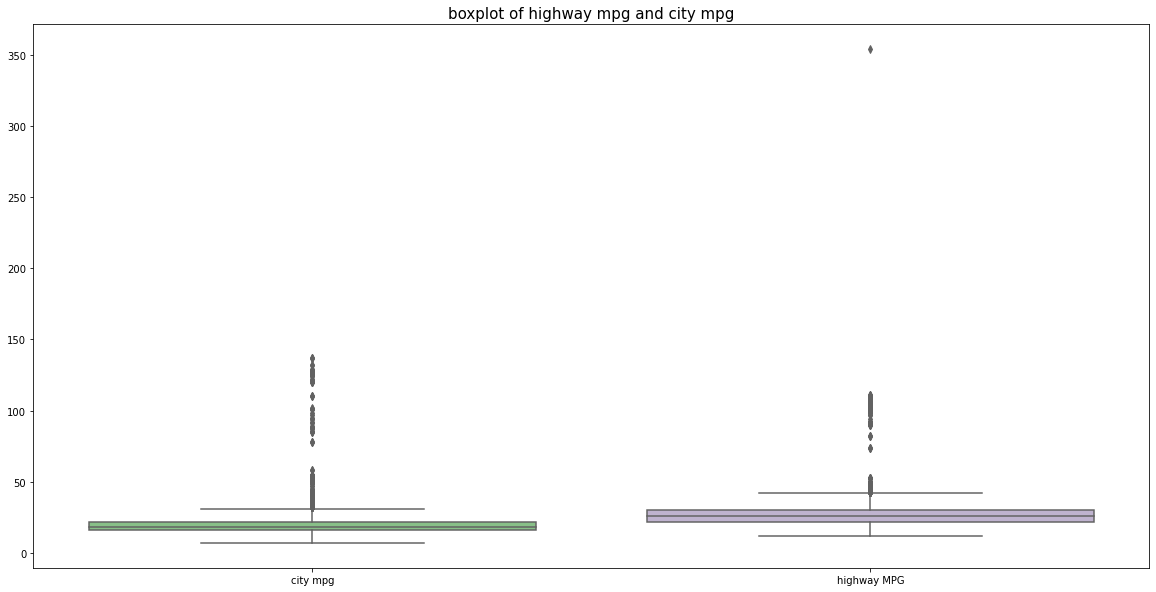

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df[['city mpg', 'highway MPG']], palette='Accent')
plt.title('boxplot of highway mpg and city mpg', fontsize=15)
plt.show()

C:\Users\IRDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine HP'>

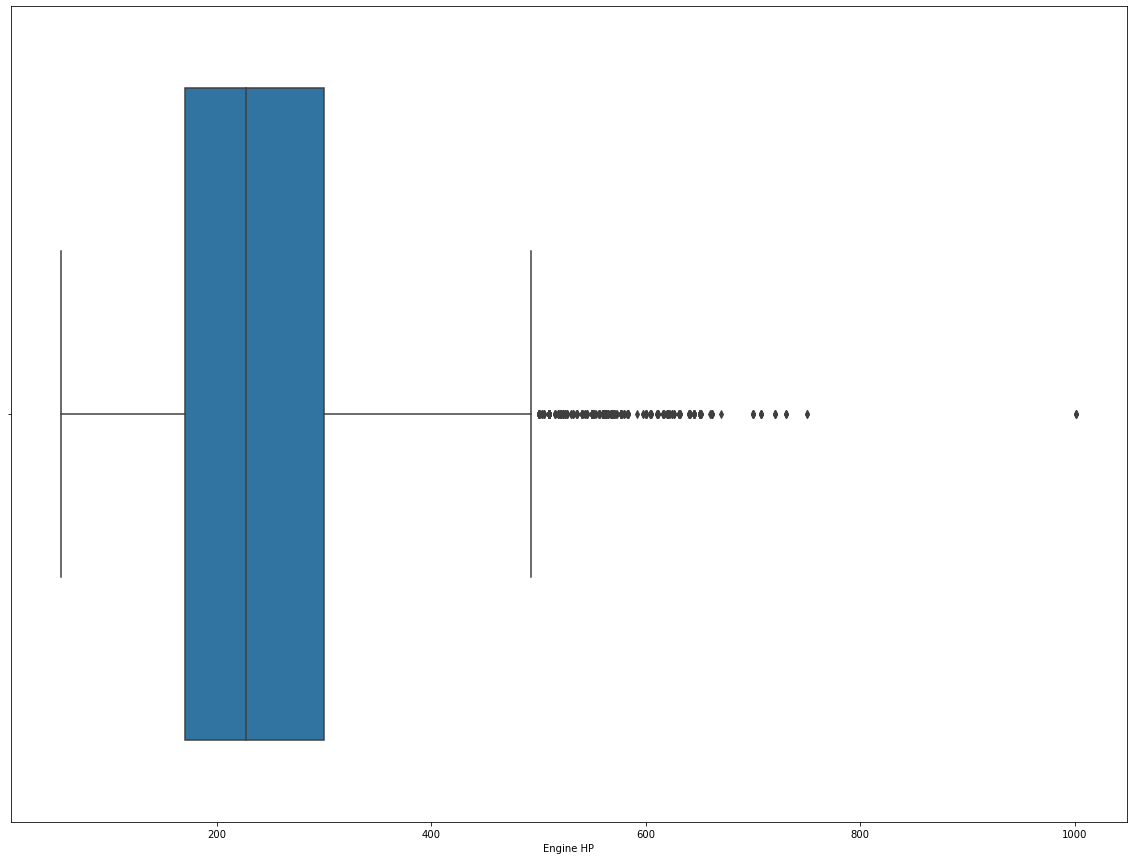

In [33]:
plt.figure(figsize=(20,15))
sns.boxplot(df['Engine HP'])

<Figure size 1440x1080 with 0 Axes>

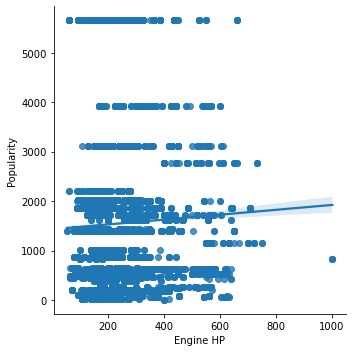

In [34]:
plt.figure(figsize=(20,15))
sns.lmplot(x='Engine HP', y='Popularity', data=df)

<Figure size 1440x720 with 0 Axes>

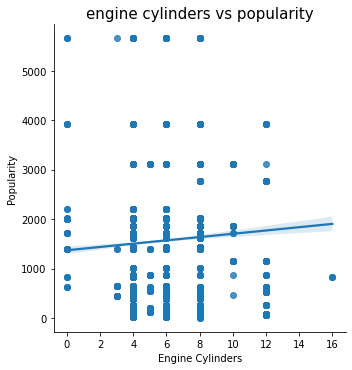

In [35]:
plt.figure(figsize=(20,10))


sns.lmplot(x='Engine Cylinders', y='Popularity', data=df)
plt.title('engine cylinders vs popularity', fontsize=15)
plt.show()

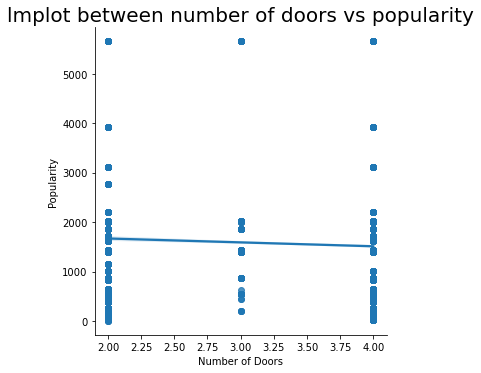

In [36]:
sns.lmplot(x='Number of Doors', y='Popularity', data=df)
plt.title('lmplot between number of doors vs popularity', fontsize=20)
plt.show()

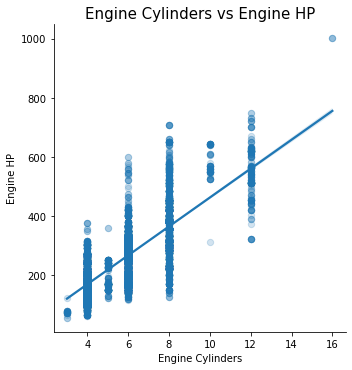

In [37]:
sns.lmplot(x = 'Engine Cylinders', y = 'Engine HP', scatter_kws = {"s": 40, "alpha": 0.2}, data = data)
plt.title("Engine Cylinders vs Engine HP", fontsize = 15)
plt.show()

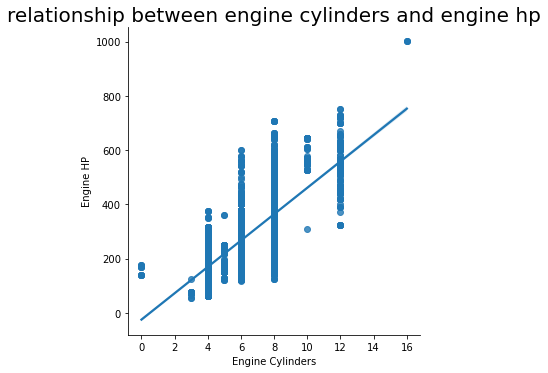

In [38]:
sns.lmplot(x='Engine Cylinders', y='Engine HP', data=df)
plt.title('relationship between engine cylinders and engine hp', fontsize=20)
plt.show()

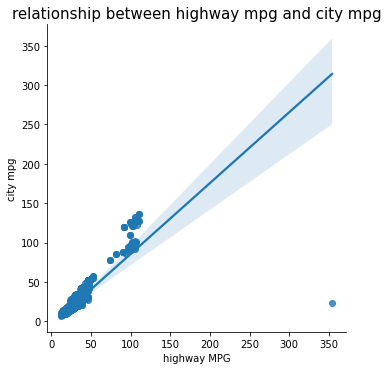

In [39]:
sns.lmplot(x='highway MPG', y='city mpg', data=df)
plt.title('relationship between highway mpg and city mpg', fontsize=15)
plt.show()

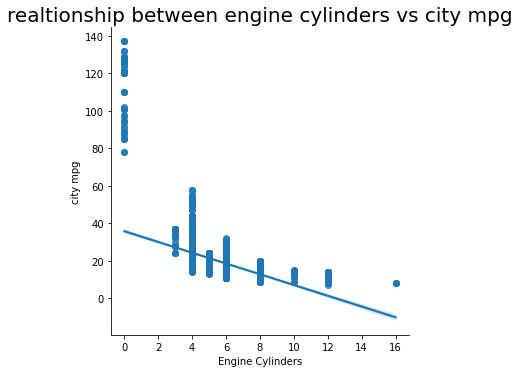

In [40]:
sns.lmplot(x='Engine Cylinders', y='city mpg', data=df)
plt.title('realtionship between engine cylinders vs city mpg', fontsize=20)
plt.show()

<AxesSubplot:>

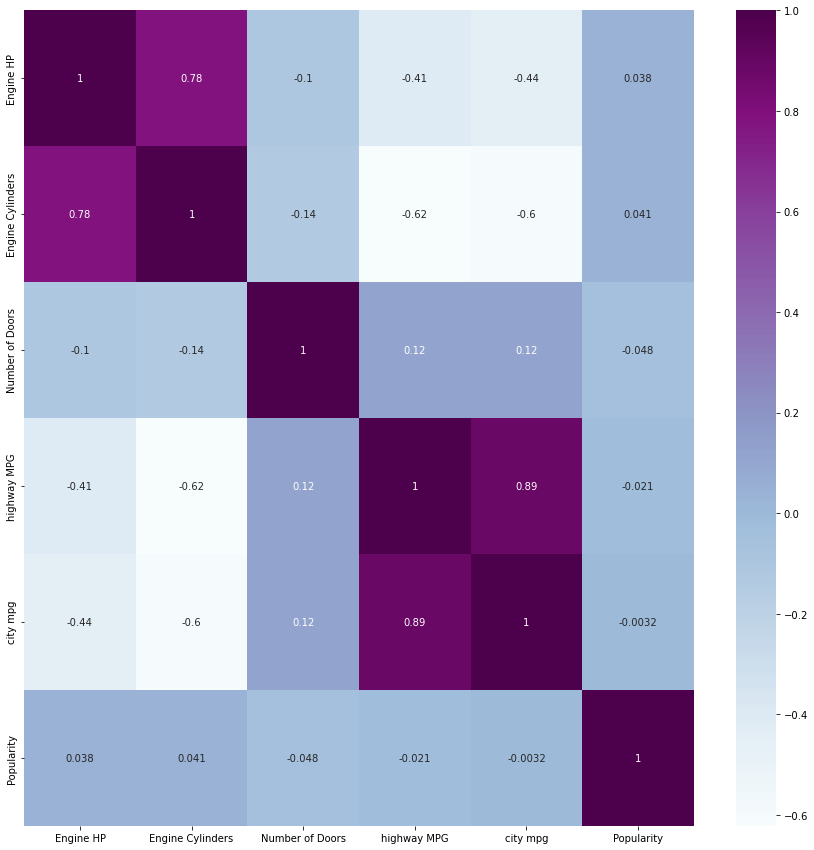

In [41]:
plt.figure(figsize=(15,15))
numerical_values = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = df[numerical_values].corr()

sns.heatmap(heatmap_data, cmap='BuPu', annot=True)

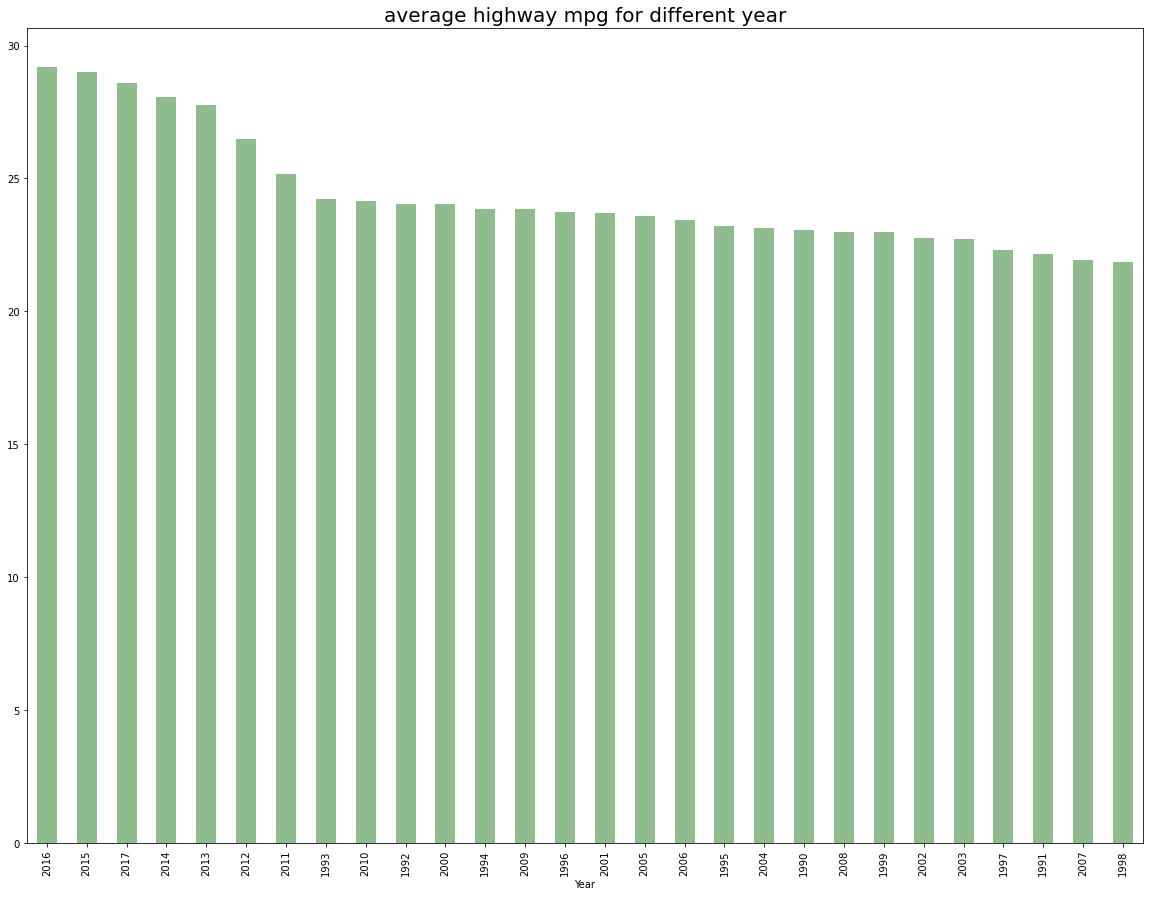

In [42]:
plt.figure(figsize=(20,15))
df.groupby('Year').mean()['highway MPG'].sort_values(ascending=False).plot(kind='bar', color='darkseagreen')
plt.title('average highway mpg for different year', fontsize=20)
plt.show()

In [43]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [44]:
df['Number of Doors'].median()

4.0

In [45]:
df['Number of Doors'].fillna(4.0, inplace=True)

In [46]:
df['Number of Doors'].isnull().sum()

0

In [47]:
df['present year']= 2021

In [48]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,present year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2021
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2021
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2021
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2021
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2021


In [49]:
df['year of manufacture'] = df['present year'] - df['Year']

In [50]:
df.drop(['present year'], inplace=True, axis=1)

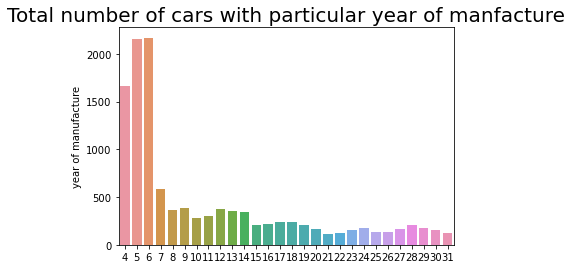

In [51]:
sns.barplot(y=df['year of manufacture'].value_counts(), x=df['year of manufacture'].value_counts().index)
plt.title('Total number of cars with particular year of manfacture', fontsize=20)
plt.show()

In [52]:
df['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [53]:
type("df['Engine Fuel Type'].mode()")

str

In [54]:
df['Engine Fuel Type'].fillna("df['Engine Fuel Type']", inplace=True )

In [55]:
df['Engine Fuel Type'].isnull().sum()

0

In [56]:
df.isnull().sum()

Make                      0
Model                     0
Year                      0
Engine Fuel Type          0
Engine HP                69
Engine Cylinders         30
Transmission Type         0
Driven_Wheels             0
Number of Doors           0
Market Category        3742
Vehicle Size              0
Vehicle Style             0
highway MPG               0
city mpg                  0
Popularity                0
MSRP                      0
year of manufacture       0
dtype: int64

In [57]:
df['Engine HP'].mean()

249.38607007176023

In [58]:
df['Engine HP'].median()

227.0

In [59]:
df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)

In [60]:
df['Engine HP'].isnull().sum()

0

In [61]:
df['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., nan, 10.,  3., 16.])

In [62]:
df['Engine Cylinders'].fillna(4, inplace=True)

In [63]:
df['Engine Cylinders'].isnull().sum()

0

In [64]:
df.isnull().sum()

Make                      0
Model                     0
Year                      0
Engine Fuel Type          0
Engine HP                 0
Engine Cylinders          0
Transmission Type         0
Driven_Wheels             0
Number of Doors           0
Market Category        3742
Vehicle Size              0
Vehicle Style             0
highway MPG               0
city mpg                  0
Popularity                0
MSRP                      0
year of manufacture       0
dtype: int64

In [65]:
df.drop(['Market Category'], inplace=True, axis=1)

In [66]:
df.isnull().sum()

Make                   0
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP              0
Engine Cylinders       0
Transmission Type      0
Driven_Wheels          0
Number of Doors        0
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
year of manufacture    0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 11914 non-null  object 
 1   Model                11914 non-null  object 
 2   Year                 11914 non-null  int64  
 3   Engine Fuel Type     11914 non-null  object 
 4   Engine HP            11914 non-null  float64
 5   Engine Cylinders     11914 non-null  float64
 6   Transmission Type    11914 non-null  object 
 7   Driven_Wheels        11914 non-null  object 
 8   Number of Doors      11914 non-null  float64
 9   Vehicle Size         11914 non-null  object 
 10  Vehicle Style        11914 non-null  object 
 11  highway MPG          11914 non-null  int64  
 12  city mpg             11914 non-null  int64  
 13  Popularity           11914 non-null  int64  
 14  MSRP                 11914 non-null  int64  
 15  year of manufacture  11914 non-null 

In [68]:
df['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [69]:
df['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

### manipulation of data

In [70]:
pip install category_encoders

In [71]:
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})

In [72]:
shuffle_data = shuffle(df, random_state=100)
X = shuffle_data.drop(['MSRP'], axis=1)
y = shuffle_data['MSRP']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [74]:
print("The size of the input train data is:{}".format(X_train.shape))
print("The size of the output train data is:{}".format(y_train.shape))
print("The size of the input test data is:{}".format(X_test.shape))
print("The size of the output test data is:{}".format(y_test.shape))

The size of the input train data is:(9531, 15)
The size of the output train data is:(9531,)
The size of the input test data is:(2383, 15)
The size of the output test data is:(2383,)


### encoding the data

In [75]:
encoder = TargetEncoder(cols='Year')

In [76]:
X_train.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,year of manufacture
10938,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,6
1223,Honda,Accord,2015,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,27,2202,6
472,Ferrari,458 Italia,2015,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,17,13,2774,6
8150,Dodge,Ram Pickup 1500,2008,regular unleaded,310.0,8.0,MANUAL,four wheel drive,4.0,Large,Crew Cab Pickup,16,12,1851,13
2038,Ford,Bronco,1996,regular unleaded,199.0,8.0,MANUAL,four wheel drive,2.0,Midsize,2dr SUV,16,13,5657,25
9242,Toyota,Sienna,2017,regular unleaded,296.0,6.0,AUTOMATIC,front wheel drive,4.0,Large,Passenger Minivan,27,19,2031,4
10963,Toyota,Tundra,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Crew Cab Pickup,17,13,2031,6
11080,Chevrolet,Uplander,2007,regular unleaded,240.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,23,16,1385,14
2553,Honda,Civic,2015,premium unleaded (required),205.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,31,22,2202,6
10027,Cadillac,STS,2010,premium unleaded (recommended),320.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,24,15,1624,11


In [77]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'])

TargetEncoder(cols=['Year'])

In [78]:
X_test['Year'] = encoder.transform(X_test['Year'])

In [79]:
X_test.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,year of manufacture
1451,Nissan,Armada,42214.467464,regular unleaded,390.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,18,13,2009,4
5801,Acura,ILX,47425.389850,premium unleaded (recommended),150.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,35,24,204,6
4820,Suzuki,Forenza,34327.714286,regular unleaded,127.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Wagon,27,19,481,14
11756,Nissan,Xterra,65987.550420,regular unleaded,261.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,22,16,2009,7
6854,Lincoln,MKC,42214.467464,regular unleaded,240.0,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,25,19,61,4


In [80]:
encoder = TargetEncoder(cols='Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])

In [81]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,year of manufacture
10938,Toyota,37820.886320,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,6
1223,Honda,28047.497942,2015,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,27,2202,6
472,Ferrari,88197.699767,2015,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,17,13,2774,6
8150,Dodge,31224.199483,2008,regular unleaded,310.0,8.0,MANUAL,four wheel drive,4.0,Large,Crew Cab Pickup,16,12,1851,13
2038,Ford,32758.239792,1996,regular unleaded,199.0,8.0,MANUAL,four wheel drive,2.0,Midsize,2dr SUV,16,13,5657,25


In [82]:
X_test.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,year of manufacture
1451,Nissan,44183.150637,42214.467464,regular unleaded,390.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,18,13,2009,4
5801,Acura,37575.576921,47425.389850,premium unleaded (recommended),150.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,35,24,204,6
4820,Suzuki,24416.230459,34327.714286,regular unleaded,127.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Wagon,27,19,481,14
11756,Nissan,35936.653312,65987.550420,regular unleaded,261.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,22,16,2009,7
6854,Lincoln,40688.341903,42214.467464,regular unleaded,240.0,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,25,19,61,4


In [83]:
encoder = TargetEncoder(cols='Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])

In [84]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,year of manufacture
10938,28920.700168,37820.886320,2015,flex-fuel (unleaded/E85),381.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,2031,6
1223,26960.299728,28047.497942,2015,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,27,2202,6
472,233388.362561,88197.699767,2015,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,Compact,Convertible,17,13,2774,6
8150,22283.702429,31224.199483,2008,regular unleaded,310.0,8.0,MANUAL,four wheel drive,4.0,Large,Crew Cab Pickup,16,12,1851,13
2038,27017.591040,32758.239792,1996,regular unleaded,199.0,8.0,MANUAL,four wheel drive,2.0,Midsize,2dr SUV,16,13,5657,25


In [85]:
X_test.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,year of manufacture
1451,28829.728070,44183.150637,42214.467464,regular unleaded,390.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,18,13,2009,4
5801,35165.339854,37575.576921,47425.389850,premium unleaded (recommended),150.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,35,24,204,6
4820,17768.379562,24416.230459,34327.714286,regular unleaded,127.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Wagon,27,19,481,14
11756,28829.728070,35936.653312,65987.550420,regular unleaded,261.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,4dr SUV,22,16,2009,7
6854,43342.586926,40688.341903,42214.467464,regular unleaded,240.0,4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,25,19,61,4


### one hot encoding

In [86]:
df['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', "df['Engine Fuel Type']"],
      dtype=object)

In [87]:
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])


In [88]:
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis=1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis=1)

In [89]:
X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)


In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9531 entries, 10938 to 2278
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 9531 non-null   float64
 1   Model                9531 non-null   float64
 2   Year                 9531 non-null   int64  
 3   Engine HP            9531 non-null   float64
 4   Engine Cylinders     9531 non-null   float64
 5   Number of Doors      9531 non-null   float64
 6   highway MPG          9531 non-null   int64  
 7   city mpg             9531 non-null   int64  
 8   Popularity           9531 non-null   int64  
 9   year of manufacture  9531 non-null   int64  
 10  Engine Fuel Type_1   9531 non-null   int64  
 11  Engine Fuel Type_2   9531 non-null   int64  
 12  Engine Fuel Type_3   9531 non-null   int64  
 13  Engine Fuel Type_4   9531 non-null   int64  
 14  Engine Fuel Type_5   9531 non-null   int64  
 15  Engine Fuel Type_6   9531 non-null

### standardization and normalization 

In [91]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler_train_new = scaler.transform(X_train)
scaler_test_new= scaler.transform(X_test)

In [92]:
scaler_train_new.shape

(9531, 49)

In [93]:
error_mean_square = []
error_mean_absolute = []

### machine learning analysis 

##### Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()
model.fit(scaler_train_new, y_train)

LinearRegression()

In [96]:
y_predict = model.predict(scaler_test_new)

In [97]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [98]:
error_mean_absolute

[301685168757648326656]

In [99]:
error_mean_square

[109527409406041010353719801545763112091648]

In [100]:
y_predict = pd.DataFrame(y_predict, columns = ['predicted output'])

In [101]:
y_predict.head()

,predicted output
0,3.174832e+20
1,3.586553e+20
2,2.552719e+20
3,5.052688e+20
4,3.174832e+20


In [102]:
y_test.to_frame().head()

,MSRP
1451,47800
5801,27050
4820,16949
11756,23390
6854,41895


In [103]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [104]:
results.head()

,predicted output,MSRP
0,3.174832e+20,47800
1,3.586553e+20,27050
2,2.552719e+20,16949
3,5.052688e+20,23390
4,3.174832e+20,41895


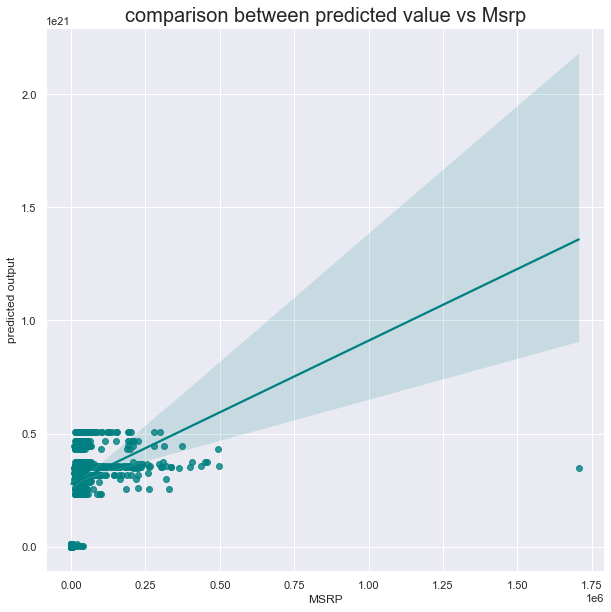

In [105]:
plt.figure(figsize =(10,10))
sns.regplot(data = results, y = 'predicted output', x = 'MSRP', color = 'teal', marker = 'o')
plt.title('comparison between predicted value vs Msrp', fontsize = 20)
plt.show()

### support vector regressor 

In [106]:
model = SVR()
model.fit(scaler_train_new, y_train)
y_predict = model.predict(scaler_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['predicted output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

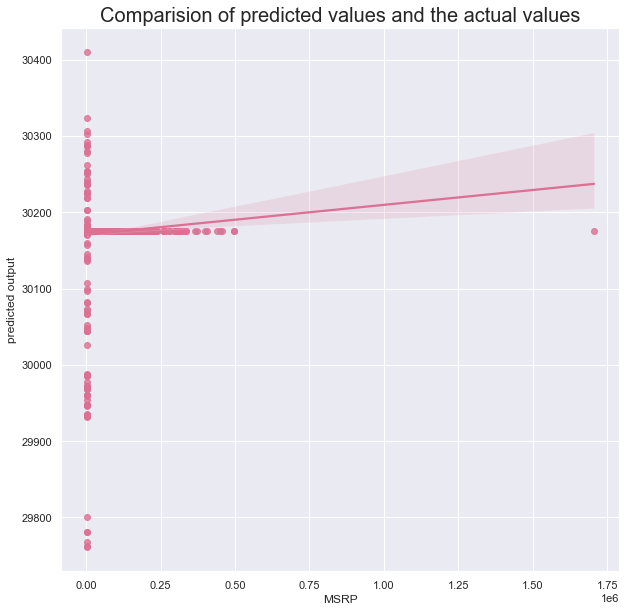

In [107]:

plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'predicted output', x = 'MSRP', color = 'palevioletred', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [108]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

### k-neighbors regressor 

In [110]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(scaler_train_new, y_train)
y_predict = model.predict(scaler_test_new)
y_predict = pd.DataFrame(y_predict, columns=['predicted output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis=1, ignore_index=False)

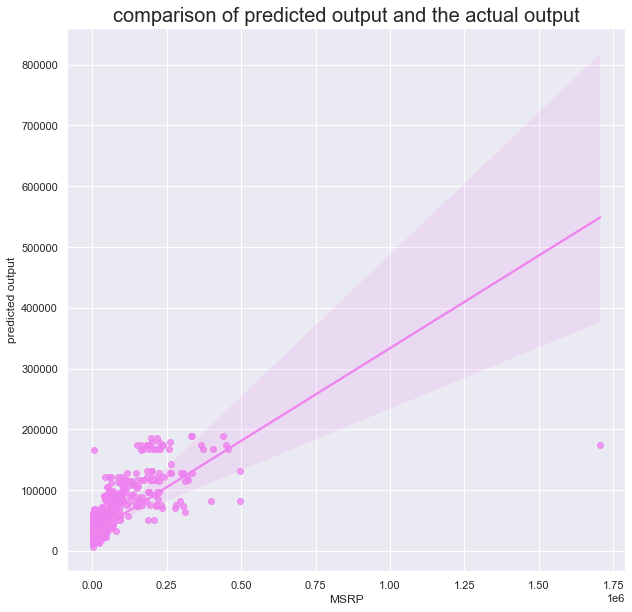

In [111]:
plt.figure(figsize=(10,10))
sns.regplot(data = results, y = 'predicted output', x = 'MSRP', color = 'violet', marker = 'o')
plt.title('comparison of predicted output and the actual output', fontsize = 20)
plt.show()

In [112]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

### pls regression

In [114]:
model = PLSRegression(n_components = 20)
model.fit(scaler_train_new, y_train)
y_predict = model.predict(scaler_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['predicted output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], ignore_index = False)

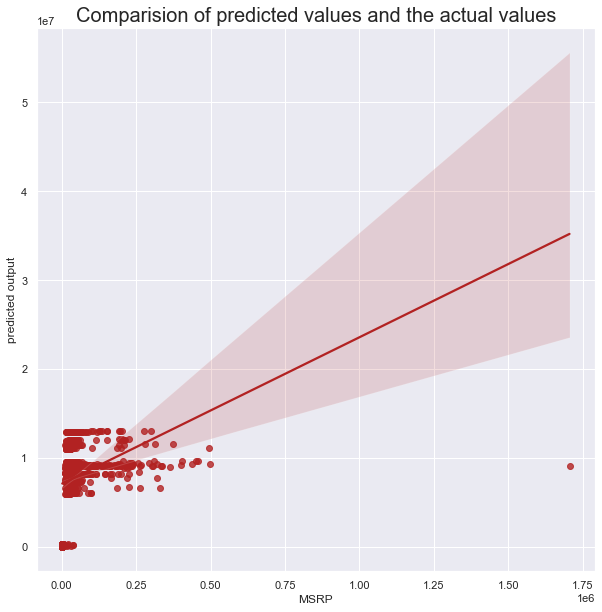

In [131]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'predicted output', x = 'MSRP', color = 'firebrick', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [113]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

### decision tree regressor

In [116]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(scaler_train_new, y_train)
y_predict = model.predict(scaler_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['predicted output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], ignore_index=False)

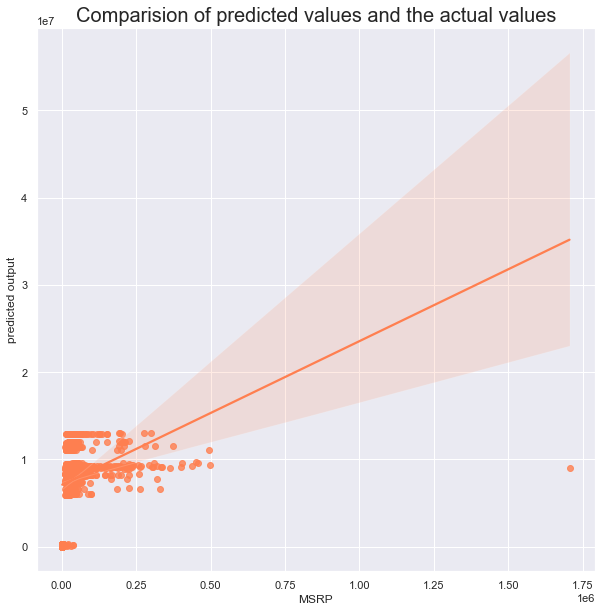

In [130]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'predicted output', x = 'MSRP', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [118]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

### gradient boosting regressor

In [119]:
model = GradientBoostingRegressor()
model.fit(scaler_train_new, y_train)
y_predict = model.predict(scaler_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['predicted output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


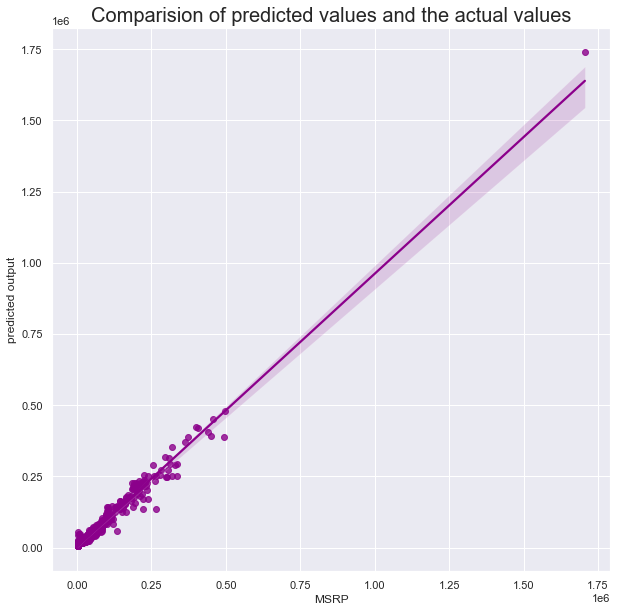

In [120]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'predicted output', x = 'MSRP', color = 'darkmagenta', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()


In [121]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

### mlp regression

In [122]:
model = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive')
model.fit(scaler_train_new, y_train)
y_predict = model.predict(scaler_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['predicted output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


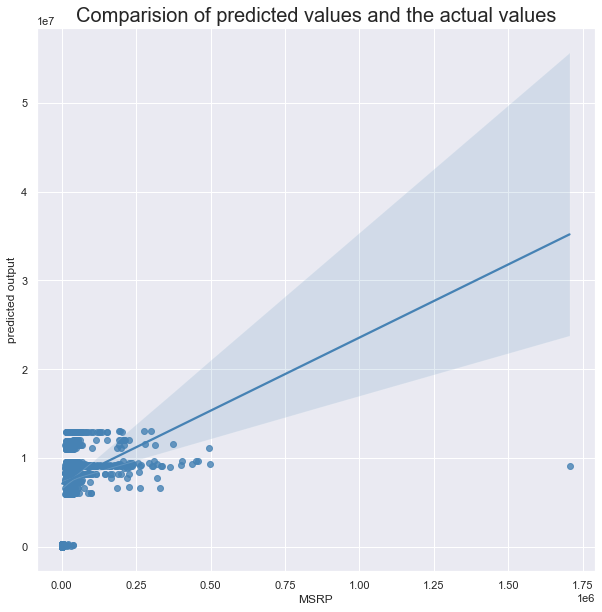

In [123]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'predicted output', x = 'MSRP', color = 'steelblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()


In [124]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

### DataFrame of machine learning models

In [126]:
data = {'Models': ['Linear Regression', 'Support Vector Regressor', 'K Nearest Regressor', 'PLS Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'MLP Regressor'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square}
model_dataframe = pd.DataFrame(data)


In [127]:
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error
0,Linear Regression,301685168757648326656,109527409406041010353719801545763112091648
1,Support Vector Regressor,22214,3426253206
2,K Nearest Regressor,14277,1941431954
3,PLS Regression,14277,1941431954
4,Decision Tree Regressor,5962,119539953
5,Gradient Boosting Regressor,5308,81751355
6,MLP Regressor,7689361,71112374045250


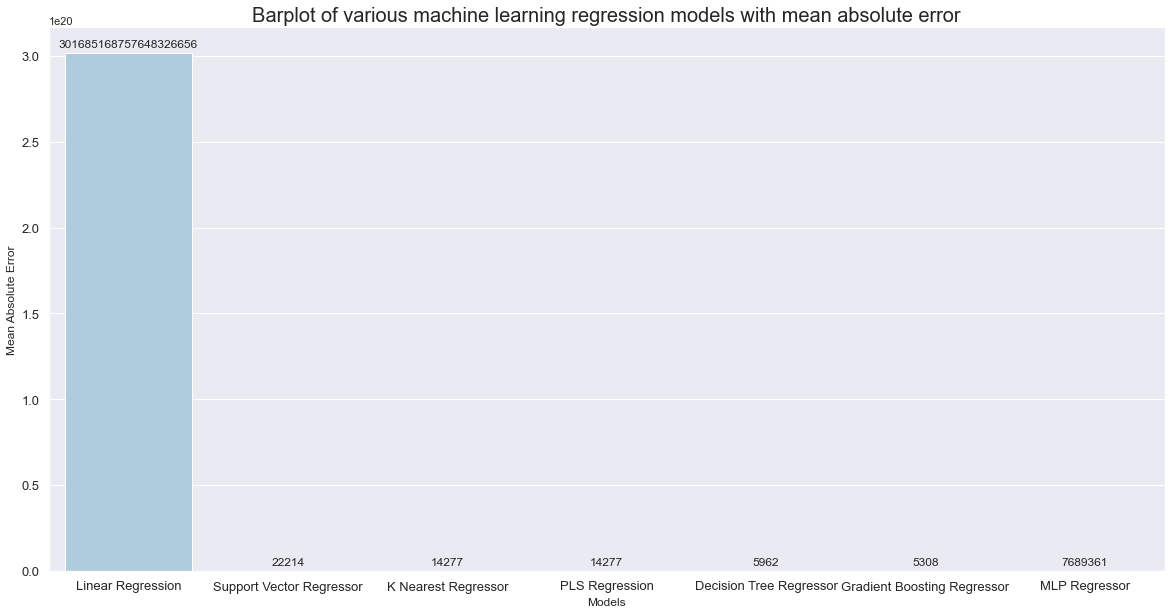

In [132]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error", fontsize = 20)
plt.show()

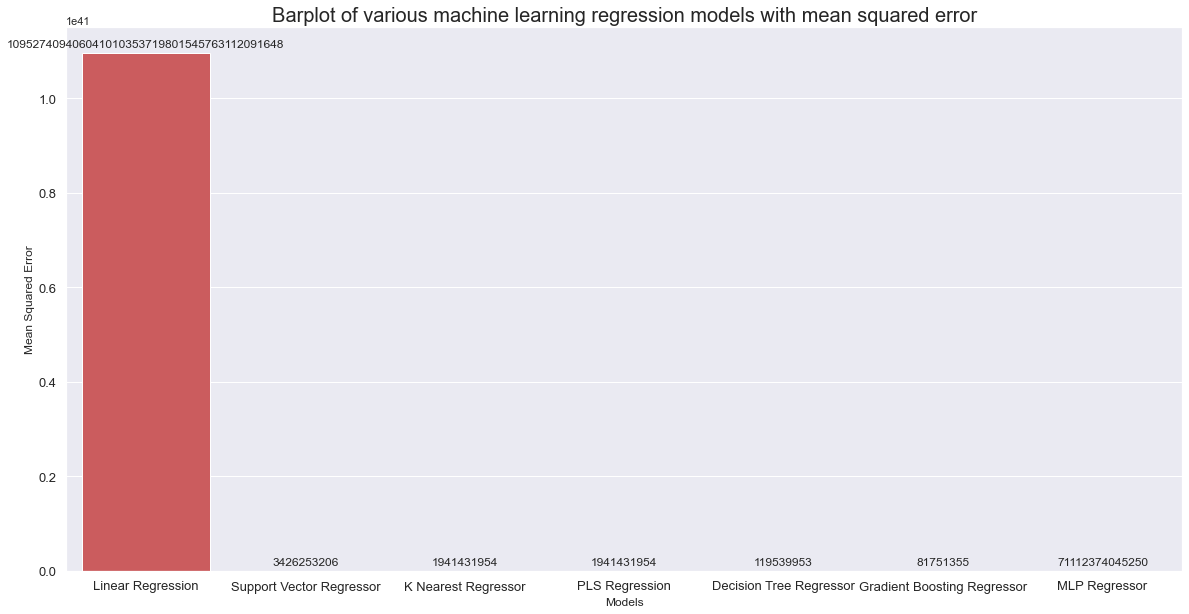

In [133]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error', palette = 'Spectral')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()